<a href="https://colab.research.google.com/github/CatTaborEP/ProjectMLUTEP/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project will make use of data provided by commonlit.org.  The goal of this project is to utilize machine learning techniques to find a more representitve number for lexile scores to more accurately match the level of materials to that which was provided by educators.  The data set can be found at https://www.commonlit.org/blog/introducing-the-clear-corpus-an-open-dataset-to-advance-research-28ff8cfea84a/ and is open source and specifically provided for research purposes.  

In [58]:
# Import necessary packages here.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

In [31]:
#import data as a dataframe
def load_dataset(filename):
  return pd.read_csv(filename)


In [46]:
X = load_dataset('lexile.csv')
a =X.columns
#define a label
Y = X['BT Easiness']
#drop unecessary columns (including the ) and label to create a new dataset to work with.
newX =X.drop(['Last Changed', 'Author','Title','MPAA\nMax','British Words',
       'MPAA \n#Max', 'Anthology','URL','Source','Pub Year','Category','Location','License','Excerpt','BT Easiness','firstPlace_pred', 'secondPlace_pred', 'thirdPlace_pred',
       'fourthPlace_pred', 'fifthPlace_pred', 'sixthPlace_pred','Kaggle split'], axis='columns')
print ('Max of BT easiness: ', Y.max())
print ('Min of BT easiness: ', Y.min())
#scaler = MinMaxScaler(feature_range=(0, 1))
#rescaledX = scaler.fit_transform(newX)
scaler = StandardScaler().fit(newX)
rescaledX = scaler.transform(newX)

#separate into test and training sets.
#60/40 split
#training data contains 2834 records.
x_train, x_test, y_train, y_test = train_test_split(rescaledX, Y, test_size=0.4, random_state=17)





Max of BT easiness:  1.711389827
Min of BT easiness:  -3.676267773


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
#Apply KNN regression


# Linear Regression

In [41]:
#complete a linear regression
regr = LinearRegression()
regr.fit(x_train, y_train)
print(regr.score(x_test, y_test))
print(regr.coef_)
print(regr.intercept_)

0.48638685414712024
[-0.09129226 -0.01128335 -0.07062101 -0.16653554 -0.05737541  0.47272777
 -0.50018441  0.07421579 -0.06112868 -0.65137201 -1.32138096  0.8986191
 -0.246408   -0.19692552  0.43214981 -0.75819296  0.00193318  0.28093015]
-0.9594572978529151


In [42]:
pred_accuracy = regr.predict(x_train)
mse = ((pred_accuracy-y_train)**2).sum()/len(pred_accuracy)
print("Training MSE:", mse)

Training MSE: 0.5176959455365524


In [43]:
pred_accuracy_test = regr.predict(x_test)
mse = ((pred_accuracy_test-y_test)**2).sum()/len(pred_accuracy_test)
print("Testing MSE:", mse)

Testing MSE: 0.5435052319165847


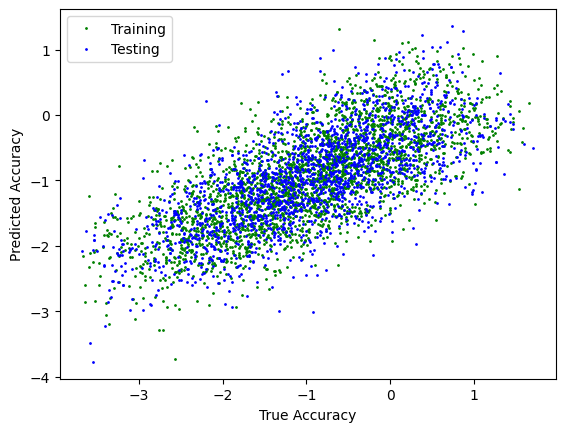

In [44]:
mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(y_train,pred_accuracy,'go',markersize=1,label="Training")
plt.plot(y_test,pred_accuracy_test,'bo',markersize=1,label="Testing")
plt.xlabel("True Accuracy")
plt.ylabel("Predicted Accuracy")
plt.legend()
plt.show()


In [47]:
#Refinement of linear regression
#removing all of the traditional metrics from the dataset.  Leaving only the raw counts

Xclean = newX.drop(['ID','BT s.e.','British WC','Joon\nWC v1','Sentence\nCount v2',
       'Flesch-Reading-Ease', 'Flesch-Kincaid-Grade-Level',
       'Automated Readability Index', 'SMOG Readability',
       'New Dale-Chall Readability Formula', 'CAREC', 'CAREC_M', 'CARES',
       'CML2RI'],axis='columns')
a1=Xclean.columns
print(a1)
scaler = StandardScaler().fit(Xclean)
rescaledX = scaler.transform(Xclean)

#separate into test and training sets.
#60/40 split
#training data contains 2834 records.
x_train1, x_test1, y_train, y_test = train_test_split(rescaledX, Y, test_size=0.4, random_state=17)


regr1 = LinearRegression()
regr1.fit(x_train1, y_train)
print(regr1.score(x_test1, y_test))
print(regr1.coef_)
print(regr1.intercept_)



Index(['MPAA\n#Avg', 'Google\nWC', 'Sentence\nCount v1', 'Paragraphs'], dtype='object')
0.16448108287878138
[-0.0447287  -0.22522157  0.38156422  0.12354139]
-0.9512966619077271


In [48]:
pred_accuracy = regr1.predict(x_train1)
mse = ((pred_accuracy-y_train)**2).sum()/len(pred_accuracy)
print("Training MSE:", mse)

Training MSE: 0.8587067908870075


In [49]:
pred_accuracy_test = regr1.predict(x_test1)
mse = ((pred_accuracy_test-y_test)**2).sum()/len(pred_accuracy_test)
print("Testing MSE:", mse)

Testing MSE: 0.8841457943343557


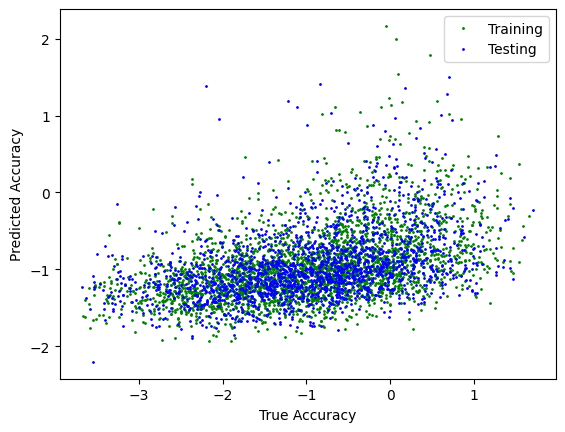

In [50]:
mpl.rcParams['agg.path.chunksize'] = 10000
plt.plot(y_train,pred_accuracy,'go',markersize=1,label="Training")
plt.plot(y_test,pred_accuracy_test,'bo',markersize=1,label="Testing")
plt.xlabel("True Accuracy")
plt.ylabel("Predicted Accuracy")
plt.legend()
plt.show()

## Beysian Regression

In [51]:
from sklearn.linear_model import BayesianRidge

beyRidge = BayesianRidge()
reg = beyRidge.fit(x_train1,y_train)
print(reg.score(x_train1,y_train))
print(reg.coef_)
print(reg.intercept_)

0.2010386609536594
[-0.0446856  -0.22345192  0.37894108  0.123782  ]
-0.951289898010674


In [52]:
pred_acc_train = reg.predict(x_train1)
mse = ((pred_acc_train-y_train)**2).sum()/len(pred_acc_train)
print("Training MSE:", mse)

Training MSE: 0.8587145784400925


In [53]:
pred_accuracy_test = regr1.predict(x_test1)
mse = ((pred_accuracy_test-y_test)**2).sum()/len(pred_accuracy_test)
print("Testing MSE:", mse)

Testing MSE: 0.8841457943343557


# KNN Regression

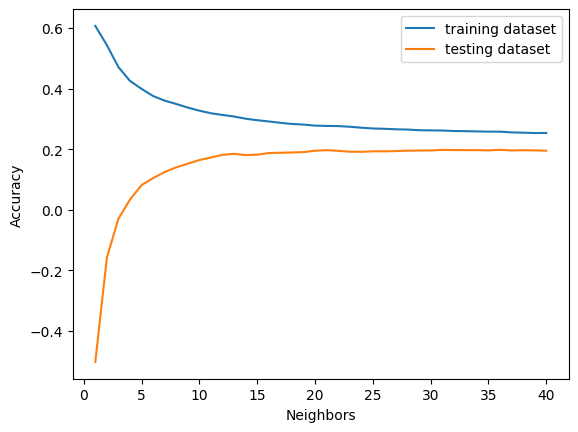

In [64]:
#Find the best k
training = []
test = []
neighbors=range(1,41)
for k in neighbors:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(x_train1, y_train)
    training.append(knn_regressor.score(x_train1, y_train))
    test.append(knn_regressor.score(x_test1, y_test))
plt.plot(neighbors,training, label="training dataset")
plt.plot(neighbors,test, label="testing dataset")
plt.ylabel("Accuracy")
plt.xlabel("Neighbors")
plt.legend()
